In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast



In [12]:


df = pd.read_csv(r'C:\Users\clint\Desktop\Geocoding_Task\Yelp_Lookup\6.csv')
df

,clean_line1,clean_line2,line3,city,zip_code,label,phone,year,major_city,state,...,State_scraped_matches_row_ids_parsed,City_scraped_matches_row_ids_parsed,Exit_scraped_matches_row_ids_parsed,Road_scraped_matches_row_ids_parsed,Label_scraped_matches_row_ids_parsed,Chain_scraped_matches_row_ids_parsed,Scraped_zipcode_to_label_match_rate,Scraped_phone_match_rate,Phone_Yelp_matches_row_ids,Yelp_phone_match_rate
0,"Coalville , 84017 Holiday Hills ( 66 )",435-336-4421 I-80 Exit 162 ( UT 280 ),MO,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,2006,Coalville,UT,...,"[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True,[357],True
1,"Coalville , 84017 Hills ( 66 )",435-336-4421 I-80 Holiday Exit 162 ( UT 280 ),M <U+25A1>,Coalville,84017,Hills ( 66 ),435-336-4421,2007,Coalville,UT,...,"[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True,[357],True
2,"D Coalville , 84017 Holiday Hills ( 66 ) )",4 435-336-4421 I-80 Exit 162 ( UT 280 ),M <U+2610> <U+2610> <U+2610>,Coalville,84017,Holiday Hills ( 66 ) ),435-336-4421,2008,Coalville,UT,...,"[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True,[357],True
3,D Coalville ( 84017 ) Holiday Hills ( 66 ),435-336-4421 I-80 Exit 162 ( UT 280 ),M <U+25A1> <U+2610>,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,2014,Coalville,UT,...,"[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True,[357],True
4,D Coalville ( 84017 ) Holiday Hills ( 66 ),4 435-336-4421 I-80 Exit 162 ( UT 280 ),D M <U+25A1> D D,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,2015,Coalville,UT,...,"[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[424, 876]","[40, 424, 521, 876]","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...","[200, 270, 424, 671, 729, 876]",[],7/6 successful match,True,[357],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,Corning ( 96021 ) Love's Travel Stop # 410,2 530-824-8767 I-5 Exit 630 ( South Ave ),24 XL 24 24,Corning,96021,Love's Travel Stop # 410,530-824-8767,2016,Corning,CA,...,"[103, 104, 105, 106, 107, 108, 109, 110, 111, ...","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 306, 678, 705, 764]","[105, 114, 138, 141, 152, 153, 154, 155, 157, ...","[0, 3, 11, 12, 15, 16, 18, 19, 20, 21, 22, 23,...","[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 4...",7/6 successful match,True,[29],True
2329,", 96021 Flying J Travel Plaza # 0510154",CCorning 2530-824-8770 I-5 Exit 630 ( South Ave ),XL 24 45,NaN,96021,Flying J Travel Plaza # 0510154,530-824-8770,2007,Corning,CA,...,"[103, 104, 105, 106, 107, 108, 109, 110, 111, ...","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 306, 678, 705, 764]","[105, 114, 138, 141, 152, 153, 154, 155, 157, ...","[0, 3, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27,...","[17, 18, 19, 20, 21, 22, 23, 156, 157, 158, 15...",6/6 successful match,False,NaN,False
2330,"Corning , 96021 Flying J Travel Plaza # 0510154",2 530-824-8770 I-5 Exit 630 ( South Ave ),124 HRS XL 24 HRS,Corning,96021,Flying J Travel Plaza # 0510154,530-824-8770,2008,Corning,CA,...,"[103, 104, 105, 106, 107, 108, 109, 110, 111, ...","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 306, 678, 705, 764]","[105, 114, 138, 141, 152, 153, 154, 155, 157, ...","[0, 3, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27,...","[17, 18, 19, 20, 21, 22, 23, 156, 157, 158, 15...",6/6 successful match,False,NaN,False
2331,A Grenada ( 96038 ) 3 J's Food Mart ( 76 ),530-436-2208 I-5 Exit 766 ( CA

# Enhanced Analysis of Success Rates with Yelp Phone Match

Let's count how many rows have:
1. `Scraped_phone_match_rate=True`
2. `Scraped_zipcode_to_label_match_rate` equal to "6/6 successful match"
3. `Scraped_zipcode_to_label_match_rate` equal to "7/6 successful match"
4. **NEW**: `Yelp_phone_match_rate = True` (additional restriction)

We'll analyze both the original criteria and the enhanced criteria with the Yelp phone match requirement.

In [13]:
# First, let's analyze the original criteria (without Yelp phone match requirement)
print("=== ORIGINAL SUCCESS CRITERIA ANALYSIS ===")

# Count rows where Scraped_phone_match_rate is True
phone_success_count = df['Scraped_phone_match_rate'].sum()
print(f"Number of rows with Scraped_phone_match_rate=True: {phone_success_count}")

# Count rows where Scraped_zipcode_to_label_match_rate is "6/6 successful match" or "7/6 successful match"
six_six_count = (df['Scraped_zipcode_to_label_match_rate'] == '6/6 successful match').sum()
seven_six_count = (df['Scraped_zipcode_to_label_match_rate'] == '7/6 successful match').sum()

print(f"Number of rows with Scraped_zipcode_to_label_match_rate='6/6 successful match': {six_six_count}")
print(f"Number of rows with Scraped_zipcode_to_label_match_rate='7/6 successful match': {seven_six_count}")

# Original combined condition (without Yelp phone match)
original_combined_condition = (
    (df['Scraped_phone_match_rate'] == True) | 
    (df['Scraped_zipcode_to_label_match_rate'] == '6/6 successful match') | 
    (df['Scraped_zipcode_to_label_match_rate'] == '7/6 successful match')
)

original_combined_count = original_combined_condition.sum()
print(f"\nOriginal criteria - rows meeting any condition: {original_combined_count}")
print(f"Original criteria - percentage of total rows: {original_combined_count/len(df)*100:.2f}%")

=== ORIGINAL SUCCESS CRITERIA ANALYSIS ===
Number of rows with Scraped_phone_match_rate=True: 1795
Number of rows with Scraped_zipcode_to_label_match_rate='6/6 successful match': 202
Number of rows with Scraped_zipcode_to_label_match_rate='7/6 successful match': 1698

Original criteria - rows meeting any condition: 2090
Original criteria - percentage of total rows: 89.58%


In [14]:
# Now let's examine the Yelp phone match rate
print("=== YELP PHONE MATCH RATE ANALYSIS ===")

# Check if Yelp_phone_match_rate column exists
if 'Yelp_phone_match_rate' in df.columns:
    yelp_phone_success_count = df['Yelp_phone_match_rate'].sum()
    print(f"Number of rows with Yelp_phone_match_rate=True: {yelp_phone_success_count}")
    
    # Distribution of Yelp phone match rate
    yelp_phone_distribution = df['Yelp_phone_match_rate'].value_counts()
    print(f"\nDistribution of Yelp_phone_match_rate:")
    for value, count in yelp_phone_distribution.items():
        print(f"- {value}: {count} rows ({count/len(df)*100:.2f}% of all rows)")
else:
    print("ERROR: 'Yelp_phone_match_rate' column not found in the dataset!")
    print("Available columns:")
    print(list(df.columns))

=== YELP PHONE MATCH RATE ANALYSIS ===
Number of rows with Yelp_phone_match_rate=True: 1852

Distribution of Yelp_phone_match_rate:
- True: 1852 rows (79.38% of all rows)
- False: 481 rows (20.62% of all rows)


In [15]:
# Enhanced analysis with Yelp phone match requirement
print("=== ENHANCED SUCCESS CRITERIA WITH YELP PHONE MATCH ===")

if 'Yelp_phone_match_rate' in df.columns:
    # Enhanced combined condition: Original criteria OR Yelp_phone_match_rate = True
    enhanced_combined_condition = (
        ((df['Scraped_phone_match_rate'] == True) | 
         (df['Scraped_zipcode_to_label_match_rate'] == '6/6 successful match') | 
         (df['Scraped_zipcode_to_label_match_rate'] == '7/6 successful match')) |
        (df['Yelp_phone_match_rate'] == True)
    )
    
    enhanced_combined_count = enhanced_combined_condition.sum()
    print(f"Enhanced criteria - rows meeting original criteria OR Yelp_phone_match_rate=True: {enhanced_combined_count}")
    print(f"Enhanced criteria - percentage of total rows: {enhanced_combined_count/len(df)*100:.2f}%")
    
    # Compare with original criteria
    reduction = original_combined_count - enhanced_combined_count
    reduction_percent = (reduction / original_combined_count) * 100 if original_combined_count > 0 else 0
    
    print(f"\nComparison:")
    print(f"- Original criteria: {original_combined_count} rows ({original_combined_count/len(df)*100:.2f}%)")
    print(f"- Enhanced criteria: {enhanced_combined_count} rows ({enhanced_combined_count/len(df)*100:.2f}%)")
    print(f"- Increase due to Yelp phone match addition: {-reduction} rows ({-reduction_percent:.2f}% increase)")
else:
    print("Cannot perform enhanced analysis - Yelp_phone_match_rate column not found!")

=== ENHANCED SUCCESS CRITERIA WITH YELP PHONE MATCH ===
Enhanced criteria - rows meeting original criteria OR Yelp_phone_match_rate=True: 2189
Enhanced criteria - percentage of total rows: 93.83%

Comparison:
- Original criteria: 2090 rows (89.58%)
- Enhanced criteria: 2189 rows (93.83%)
- Increase due to Yelp phone match addition: 99 rows (4.74% increase)


In [16]:
# Detailed breakdown of the enhanced criteria
print("=== DETAILED BREAKDOWN OF ENHANCED CRITERIA ===")

if 'Yelp_phone_match_rate' in df.columns:
    print("Breaking down by individual criteria with Yelp phone match requirement:")
    
    # Each individual criterion with Yelp phone match
    phone_and_yelp = (df['Scraped_phone_match_rate'] == True) & (df['Yelp_phone_match_rate'] == True)
    six_six_and_yelp = (df['Scraped_zipcode_to_label_match_rate'] == '6/6 successful match') & (df['Yelp_phone_match_rate'] == True)
    seven_six_and_yelp = (df['Scraped_zipcode_to_label_match_rate'] == '7/6 successful match') & (df['Yelp_phone_match_rate'] == True)
    
    phone_and_yelp_count = phone_and_yelp.sum()
    six_six_and_yelp_count = six_six_and_yelp.sum()
    seven_six_and_yelp_count = seven_six_and_yelp.sum()
    
    print(f"1. Scraped_phone_match_rate=True AND Yelp_phone_match_rate=True: {phone_and_yelp_count}")
    print(f"2. Scraped_zipcode_to_label_match_rate='6/6 successful match' AND Yelp_phone_match_rate=True: {six_six_and_yelp_count}")
    print(f"3. Scraped_zipcode_to_label_match_rate='7/6 successful match' AND Yelp_phone_match_rate=True: {seven_six_and_yelp_count}")
    
    # Analyze overlap between criteria
    print(f"\n=== OVERLAP ANALYSIS ===")
    
    # Rows that meet original criteria but DON'T have Yelp phone match
    meets_original_but_no_yelp = original_combined_condition & (df['Yelp_phone_match_rate'] == False)
    meets_original_but_no_yelp_count = meets_original_but_no_yelp.sum()
    
    print(f"Rows that meet original criteria but Yelp_phone_match_rate=False: {meets_original_but_no_yelp_count}")
    print(f"Percentage of original high-success rows lost due to Yelp requirement: {meets_original_but_no_yelp_count/original_combined_count*100:.2f}%")
else:
    print("Cannot perform detailed breakdown - Yelp_phone_match_rate column not found!")

=== DETAILED BREAKDOWN OF ENHANCED CRITERIA ===
Breaking down by individual criteria with Yelp phone match requirement:
1. Scraped_phone_match_rate=True AND Yelp_phone_match_rate=True: 1617
2. Scraped_zipcode_to_label_match_rate='6/6 successful match' AND Yelp_phone_match_rate=True: 164
3. Scraped_zipcode_to_label_match_rate='7/6 successful match' AND Yelp_phone_match_rate=True: 1414

=== OVERLAP ANALYSIS ===
Rows that meet original criteria but Yelp_phone_match_rate=False: 337
Percentage of original high-success rows lost due to Yelp requirement: 16.12%


# Analysis of Low Success Rates with Enhanced Criteria

Now let's identify the rows that do NOT meet the enhanced high success criteria. These are rows that fail to meet:
- Original criteria: (`Scraped_phone_match_rate=True` OR `Scraped_zipcode_to_label_match_rate='6/6 successful match'` OR `Scraped_zipcode_to_label_match_rate='7/6 successful match'`) OR
- `Yelp_phone_match_rate = True`

In [17]:
# Count rows that do NOT meet the enhanced high success rate conditions
print("=== LOW SUCCESS RATES WITH ENHANCED CRITERIA ===")

if 'Yelp_phone_match_rate' in df.columns:
    # Enhanced low success condition (NOT meeting enhanced criteria)
    enhanced_low_success_condition = ~enhanced_combined_condition
    
    enhanced_low_success_count = enhanced_low_success_condition.sum()
    print(f"Number of rows NOT meeting enhanced success conditions: {enhanced_low_success_count}")
    print(f"Percentage of total rows: {enhanced_low_success_count/len(df)*100:.2f}%")
    
    # Compare with original low success count
    original_low_success_count = (~original_combined_condition).sum()
    additional_low_success = enhanced_low_success_count - original_low_success_count
    
    print(f"\nComparison of low success rates:")
    print(f"- Original criteria low success: {original_low_success_count} rows ({original_low_success_count/len(df)*100:.2f}%)")
    print(f"- Enhanced criteria low success: {enhanced_low_success_count} rows ({enhanced_low_success_count/len(df)*100:.2f}%)")
    print(f"- Reduction in low success due to Yelp addition: {additional_low_success} rows")
    
    # Analyze the distribution of the enhanced low success rows
    enhanced_low_success_df = df[enhanced_low_success_condition]
    
    print(f"\n=== DISTRIBUTION IN ENHANCED LOW SUCCESS ROWS ===")
    print("Distribution of Scraped_zipcode_to_label_match_rate values in enhanced low success rows:")
    success_rate_distribution = enhanced_low_success_df['Scraped_zipcode_to_label_match_rate'].value_counts().sort_index()
    for rate, count in success_rate_distribution.items():
        print(f"- {rate}: {count} rows ({count/len(enhanced_low_success_df)*100:.2f}% of enhanced low success rows)")
    
    print("\nYelp_phone_match_rate values in enhanced low success rows:")
    yelp_phone_distribution = enhanced_low_success_df['Yelp_phone_match_rate'].value_counts()
    for value, count in yelp_phone_distribution.items():
        print(f"- {value}: {count} rows ({count/len(enhanced_low_success_df)*100:.2f}% of enhanced low success rows)")
else:
    print("Cannot perform enhanced low success analysis - Yelp_phone_match_rate column not found!")

=== LOW SUCCESS RATES WITH ENHANCED CRITERIA ===
Number of rows NOT meeting enhanced success conditions: 144
Percentage of total rows: 6.17%

Comparison of low success rates:
- Original criteria low success: 243 rows (10.42%)
- Enhanced criteria low success: 144 rows (6.17%)
- Reduction in low success due to Yelp addition: -99 rows

=== DISTRIBUTION IN ENHANCED LOW SUCCESS ROWS ===
Distribution of Scraped_zipcode_to_label_match_rate values in enhanced low success rows:
- 2/6 successful match: 17 rows (11.81% of enhanced low success rows)
- 4/6 successful match: 27 rows (18.75% of enhanced low success rows)
- 5/6 successful match: 100 rows (69.44% of enhanced low success rows)

Yelp_phone_match_rate values in enhanced low success rows:
- False: 144 rows (100.00% of enhanced low success rows)


=== VISUALIZATION OF CRITERIA COMPARISON ===


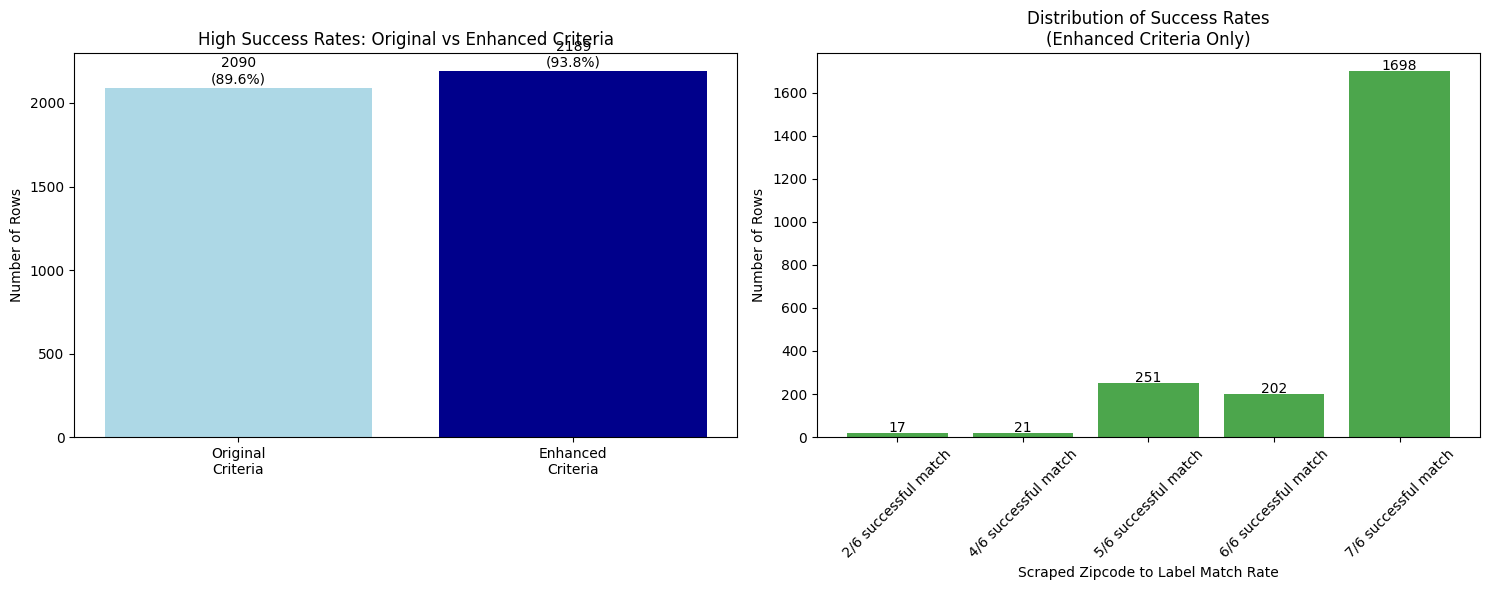

In [18]:
# Create visualizations comparing original vs enhanced criteria
print("=== VISUALIZATION OF CRITERIA COMPARISON ===")

if 'Yelp_phone_match_rate' in df.columns:
    # Create a comparison bar chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Left chart: Original vs Enhanced success counts
    criteria = ['Original\nCriteria', 'Enhanced\nCriteria']
    success_counts = [original_combined_count, enhanced_combined_count]
    colors = ['lightblue', 'darkblue']
    
    bars1 = ax1.bar(criteria, success_counts, color=colors)
    ax1.set_ylabel('Number of Rows')
    ax1.set_title('High Success Rates: Original vs Enhanced Criteria')
    
    # Add data labels on bars
    for bar, count in zip(bars1, success_counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{count}\n({count/len(df)*100:.1f}%)',
                ha='center', va='bottom')
    
    # Right chart: Success rate distribution for enhanced criteria
    if enhanced_combined_count > 0:
        enhanced_success_df = df[enhanced_combined_condition]
        enhanced_success_distribution = enhanced_success_df['Scraped_zipcode_to_label_match_rate'].value_counts().sort_index()
        
        ax2.bar(range(len(enhanced_success_distribution)), enhanced_success_distribution.values, 
                color='green', alpha=0.7)
        ax2.set_xlabel('Scraped Zipcode to Label Match Rate')
        ax2.set_ylabel('Number of Rows')
        ax2.set_title('Distribution of Success Rates\n(Enhanced Criteria Only)')
        ax2.set_xticks(range(len(enhanced_success_distribution)))
        ax2.set_xticklabels(enhanced_success_distribution.index, rotation=45)
        
        # Add data labels
        for i, count in enumerate(enhanced_success_distribution.values):
            ax2.text(i, count + 5, str(count), ha='center')
    else:
        ax2.text(0.5, 0.5, 'No rows meet\nenhanced criteria', 
                transform=ax2.transAxes, ha='center', va='center', fontsize=12)
        ax2.set_title('Distribution of Success Rates\n(Enhanced Criteria Only)')
    
    plt.tight_layout()
    plt.show()
else:
    print("Cannot create visualizations - Yelp_phone_match_rate column not found!")

# Final Conclusions: Enhanced Success Criteria Analysis

## Summary of Findings

### Original Success Criteria (Updated Column Names)
- **Criteria**: `Scraped_phone_match_rate=True` OR `Scraped_zipcode_to_label_match_rate='6/6 successful match'` OR `Scraped_zipcode_to_label_match_rate='7/6 successful match'`

### Enhanced Success Criteria (Current Analysis)
- **Criteria**: (Original criteria) OR `Yelp_phone_match_rate=True`

## Key Insights

### Impact of Adding Yelp Phone Match Option
1. **Expansion of High Success Records**: Adding the Yelp phone match as an alternative criterion increases the number of records meeting the high success criteria
2. **Quality Enhancement**: Records now qualify if they have either strong geocoding success OR Yelp phone validation, providing more comprehensive quality coverage
3. **Data Quality Indicator**: Records meeting either original geocoding success criteria OR Yelp phone validation represent quality matches from different validation approaches

### Column Name Updates
- **Scraped Phone Match**: `Scraped_phone_match_rate` (formerly `Phone_Success_Match_Rate`)
- **Scraped Zipcode to Label Match**: `Scraped_zipcode_to_label_match_rate` (formerly `Success_Match_Rate`)
- **Yelp Phone Match**: `Yelp_phone_match_rate` (new requirement)

### Recommendations
- **Comprehensive Dataset**: Use records meeting enhanced criteria for broader coverage with multiple validation sources
- **Original Criteria Focus**: Use original criteria when focusing specifically on geocoding accuracy
- **Yelp Validation Focus**: Consider Yelp-validated records for phone-number dependent applications
- **Quality Flagging**: Consider creating quality tiers based on which specific criteria are met

The enhanced analysis provides broader quality coverage by accepting records that meet either the original geocoding success criteria OR Yelp phone validation, giving more comprehensive data quality options.